In [1]:
# data challenge 1 conversion rate
# goal 1: propose a model that predicts conversion rate
# goal 2: based on the model, improve revenue.

# Questions  definition of "conversion"? from the example, it seems that "buying" means "converted" 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv("conversion_data.csv")

In [3]:
data_set.info()
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
data_set.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
# select rows that have null values in it (zero in this data frame)
null_rows = data_set[data_set.isnull().any(axis=1)] 
# max age is 123(an old friend from 19th century), sort age to replace unreasonable rows with median
data_set.sort_values(by=['age'],ascending=False ).head(5)

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1
265167,US,79,1,Direct,1,0
192644,US,77,0,Direct,4,0
154217,US,73,1,Seo,5,0


In [6]:
data_set.loc[data_set['age']>80,'age']=int(data_set.age.median())
data_set.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569307,0.685465,4.872966,0.032258
std,8.268932,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In [7]:
# 
data_set.loc[data_set['converted']==1].count()

country                10200
age                    10200
new_user               10200
source                 10200
total_pages_visited    10200
converted              10200
dtype: int64

In [8]:
data_set.country.unique()

array(['UK', 'US', 'China', 'Germany'], dtype=object)

In [9]:
# use f-string
for column in data_set.columns:
    uniques = sorted(data_set[column].unique())
    print(f'{column :<20} {len(uniques) :<5}', uniques[:5])

country              4     ['China', 'Germany', 'UK', 'US']
age                  58    [17, 18, 19, 20, 21]
new_user             2     [0, 1]
source               3     ['Ads', 'Direct', 'Seo']
total_pages_visited  29    [1, 2, 3, 4, 5]
converted            2     [0, 1]


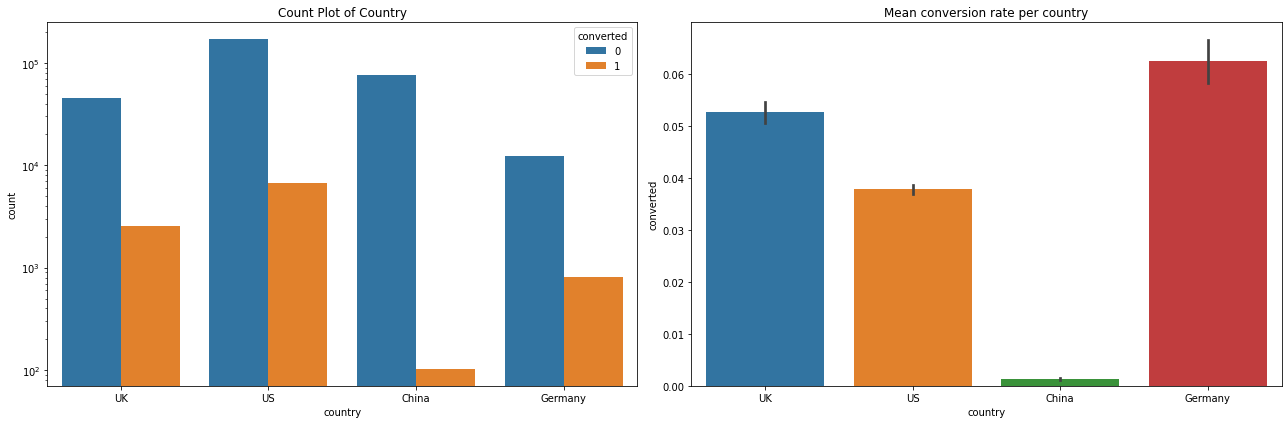

In [10]:
# visualize users in different countries
# "reset_index" adds original index as a column and creates a new index 
grouped = data_set.loc[:,['country','converted']].groupby('country').mean().reset_index()
# Object-Oriented plotting
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='country',hue='converted',data=data_set,ax=ax[0])
ax[0].set_title('Count Plot of Country',fontsize = 12)
ax[0].set_yscale('log')
sns.barplot(x='country',y='converted',data=data_set,ax=ax[1])
ax[1].set_title('Mean conversion rate per country',fontsize=12)
plt.tight_layout()
plt.show()

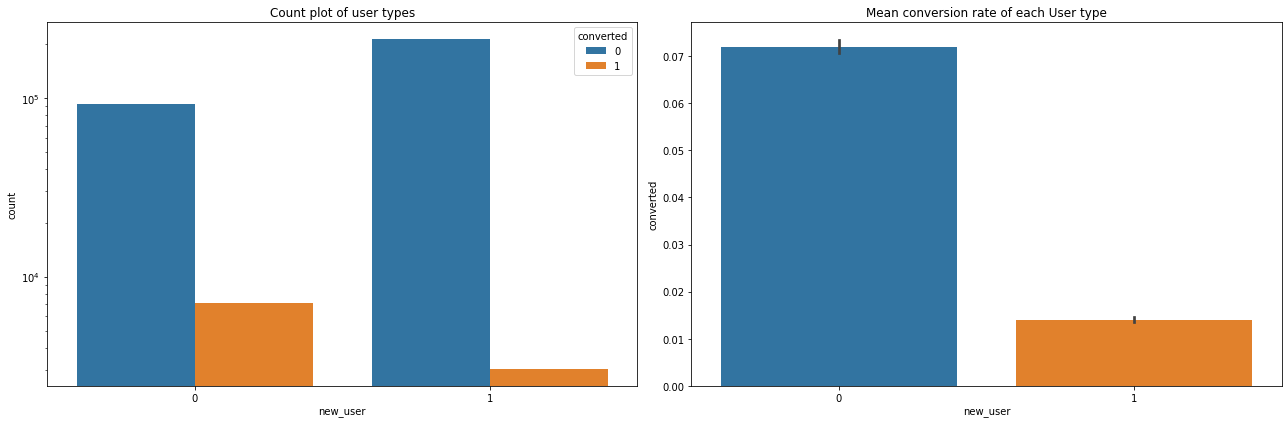

In [11]:
# visualize users with different types
grouped = data_set.loc[:,['new_user','converted']].groupby('new_user').mean().reset_index()
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='new_user',hue='converted',data=data_set,ax=ax[0])
ax[0].set_title('Count plot of user types')
ax[0].set_yscale('log')
sns.barplot(x='new_user',y='converted',data=data_set,ax=ax[1])
ax[1].set_title('Mean conversion rate of each User type')
plt.tight_layout()
plt.show()

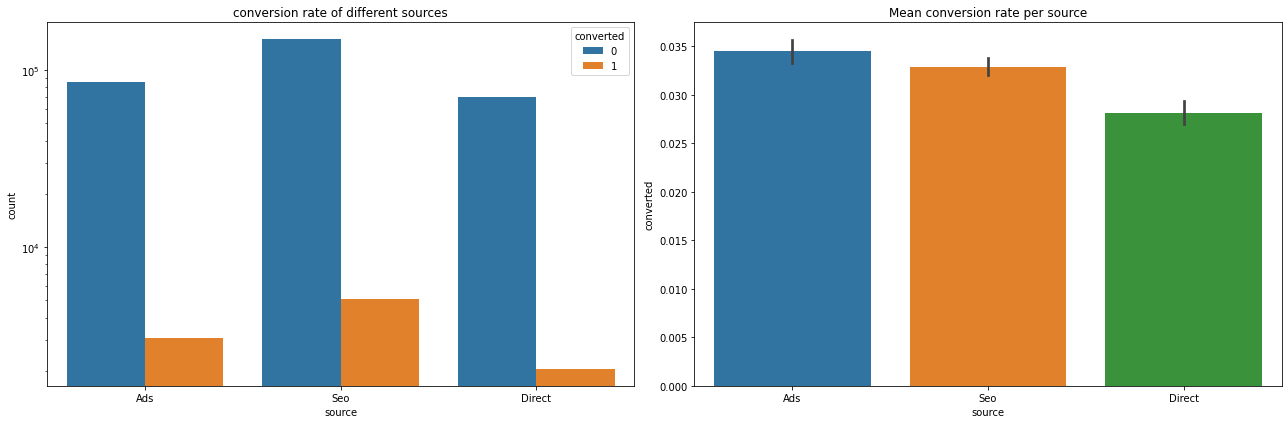

In [12]:
# visualize from diffrent sources
grouped= data_set.loc[:,['source','converted']].groupby('source').mean().reset_index()
df,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='source',hue='converted',data=data_set,ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('conversion rate of different sources')
sns.barplot(x='source',y='converted',data=data_set,ax=ax[1])
ax[1].set_title('Mean conversion rate per source')
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


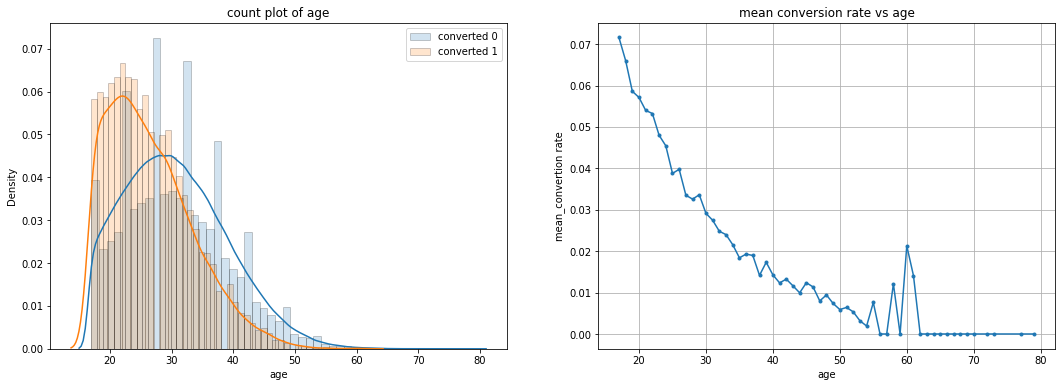

In [13]:
grouped = data_set[['age','converted']].groupby('age').mean().reset_index()
hist_kws ={'histtype':'bar', 'edgecolor':'black','alpha':0.2}

fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.distplot(data_set[data_set['converted']==0]['age'],label='converted 0',
            ax=ax[0],hist_kws=hist_kws)
sns.displot(data_set[data_set['converted']==1]['age'],label='converted 1',
            ax=ax[0],hist_kws=hist_kws)
ax[0].set_title('count plot of age',fontsize=12)
ax[0].legend()
ax[1].plot(grouped['age'],grouped['converted'],'.-')
ax[1].set_title('mean conversion rate vs age', fontsize =12)
ax[1].set_xlabel('age')
ax[1].set_ylabel('mean_convertion rate')
ax[1].grid(True)
plt.show()

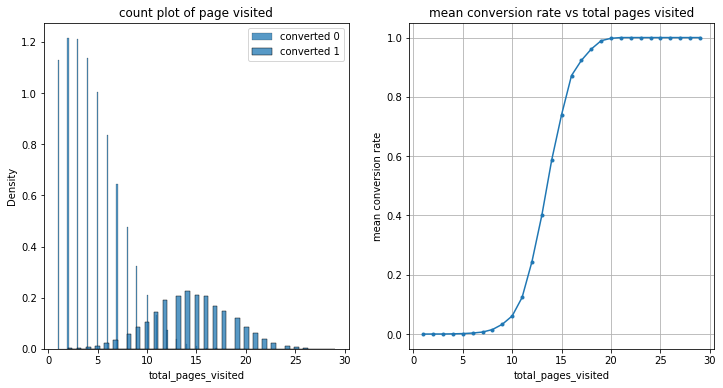

In [22]:
grouped = data_set[['total_pages_visited','converted']].groupby('total_pages_visited').mean().reset_index()
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.histplot(data_set[data_set['converted']==0]['total_pages_visited'],label='converted 0',ax=ax[0],stat='density')
sns.histplot(data_set[data_set['converted']==1]['total_pages_visited'],label='converted 1',ax=ax[0],stat='density')
ax[0].set_title('count plot of page visited')
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'],grouped['converted'],'.-')
ax[1].set_title('mean conversion rate vs total pages visited')
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('mean conversion rate')
ax[1].grid(True)
plt.show()

In [37]:
# transform categorical variables into dummies to fit ML models
# machine learning - ensemble method random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import KFold, cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, average_precision_score
df = pd.get_dummies(data_set)
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  316200 non-null  int64
 1   new_user             316200 non-null  int64
 2   total_pages_visited  316200 non-null  int64
 3   converted            316200 non-null  int64
 4   country_China        316200 non-null  uint8
 5   country_Germany      316200 non-null  uint8
 6   country_UK           316200 non-null  uint8
 7   country_US           316200 non-null  uint8
 8   source_Ads           316200 non-null  uint8
 9   source_Direct        316200 non-null  uint8
 10  source_Seo           316200 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 11.8 MB


In [35]:
Y= df['converted'].values
X = df.drop('converted',axis=1).values
kf = KFold(n_splits=10,shuffle=True, random_state=35)

In [41]:
acc_results=[]
avg_precision=[]
importance_results=[]
model= RandomForestClassifier(random_state=35)
for train,test in kf.split(X):
    prediction = model.fit(X[train],Y[train]).predict(X[test])
    acc_results.append(accuracy_score(Y[test],prediction))
    avg_precision.append(average_precision_score(Y[test],prediction))
    importance_results.append(model.feature_importances_.tolist())

print(f'Accuracy results: {np.array(acc_results).mean()}')
print(f'Average Precision score: {np.array(avg_precision).mean()}')

Accuracy results: 0.9848007590132827
Average Precision score: 0.5654688814901195


<AxesSubplot:>

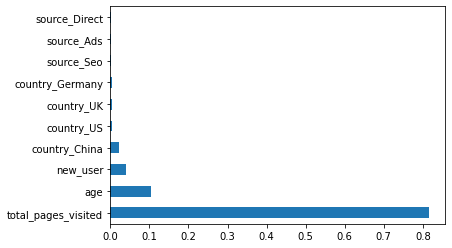

In [45]:
# visualize feature importance
avg_importance = map(np.mean,zip(*importance_results))
features = df.drop('converted',axis=1).columns.values
pd.Series(model.feature_importances_,index=features).nlargest(10).plot(kind='barh')